Processing file MAX__8_MMStack_Pos0.ome.tif, shape: (2, 2304, 2304)


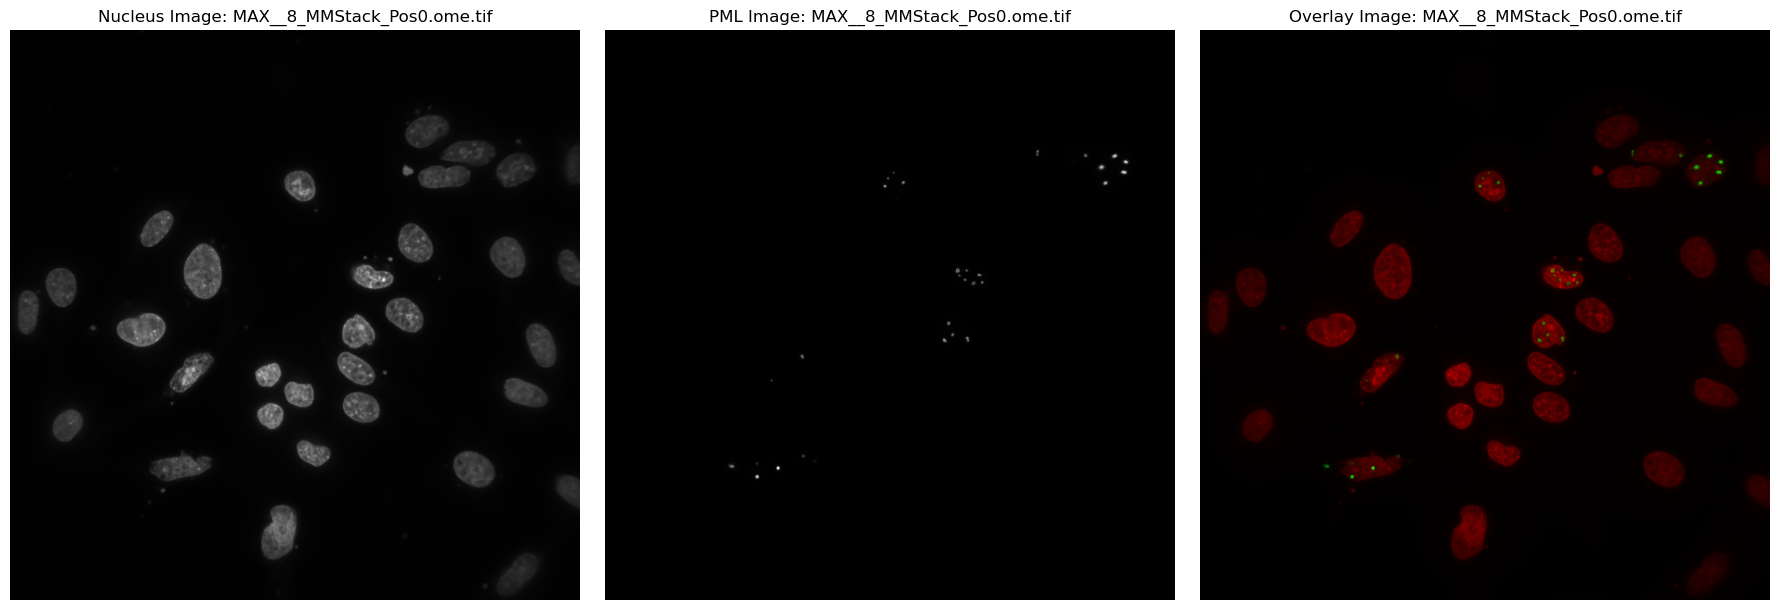

Processing file MAX__7_MMStack_Pos0.ome.tif, shape: (2, 1012, 1012)


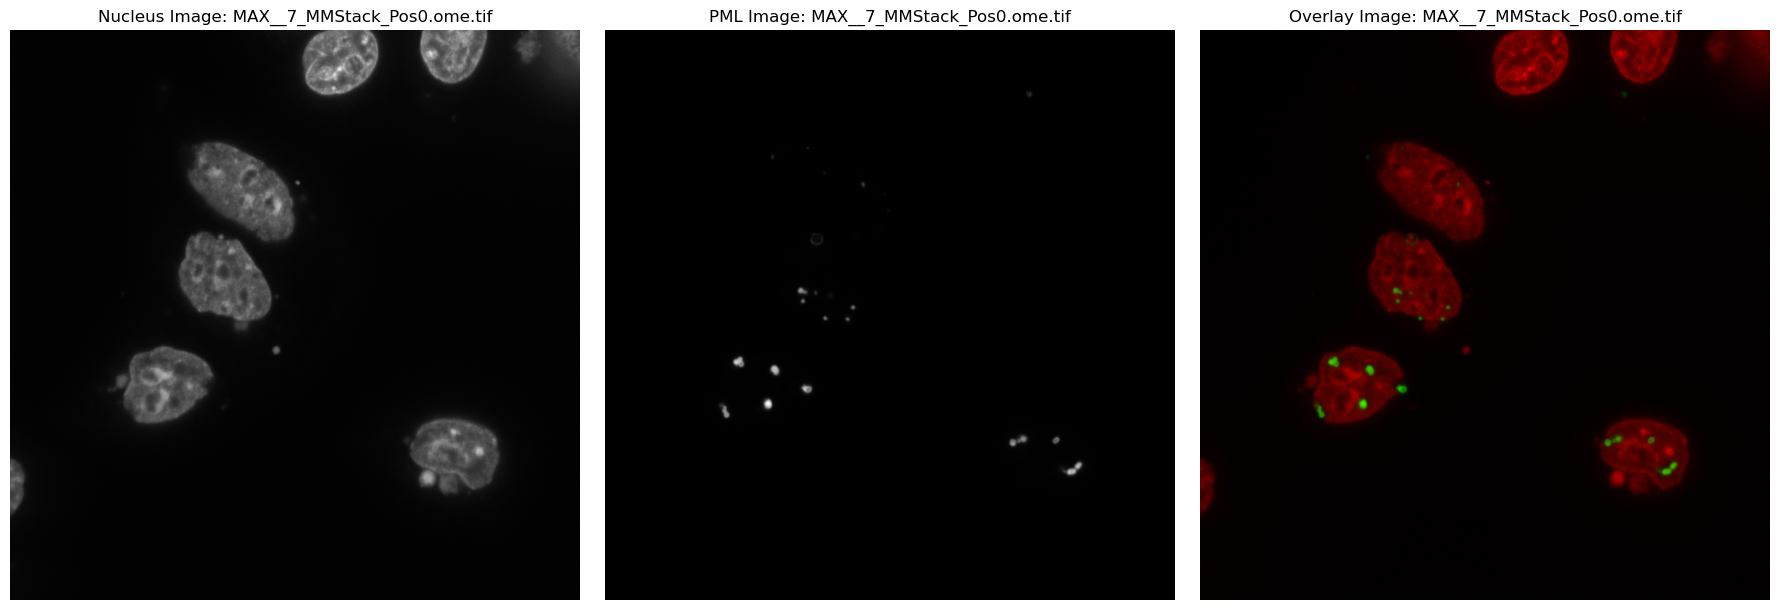

Processing file MAX__9_MMStack_Pos0.ome.tif, shape: (2, 528, 528)


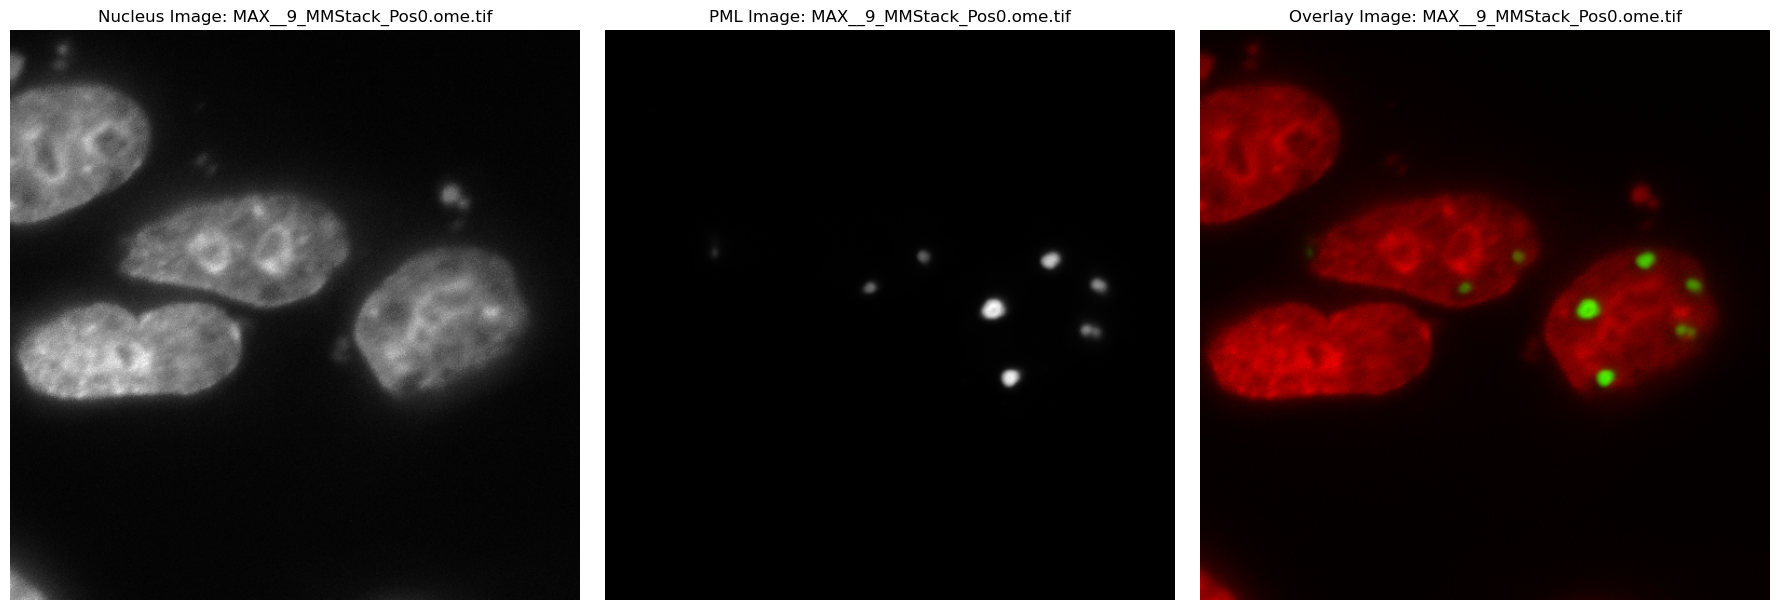

Processing file MAX__5_MMStack_Pos0.ome.tif, shape: (2, 820, 820)


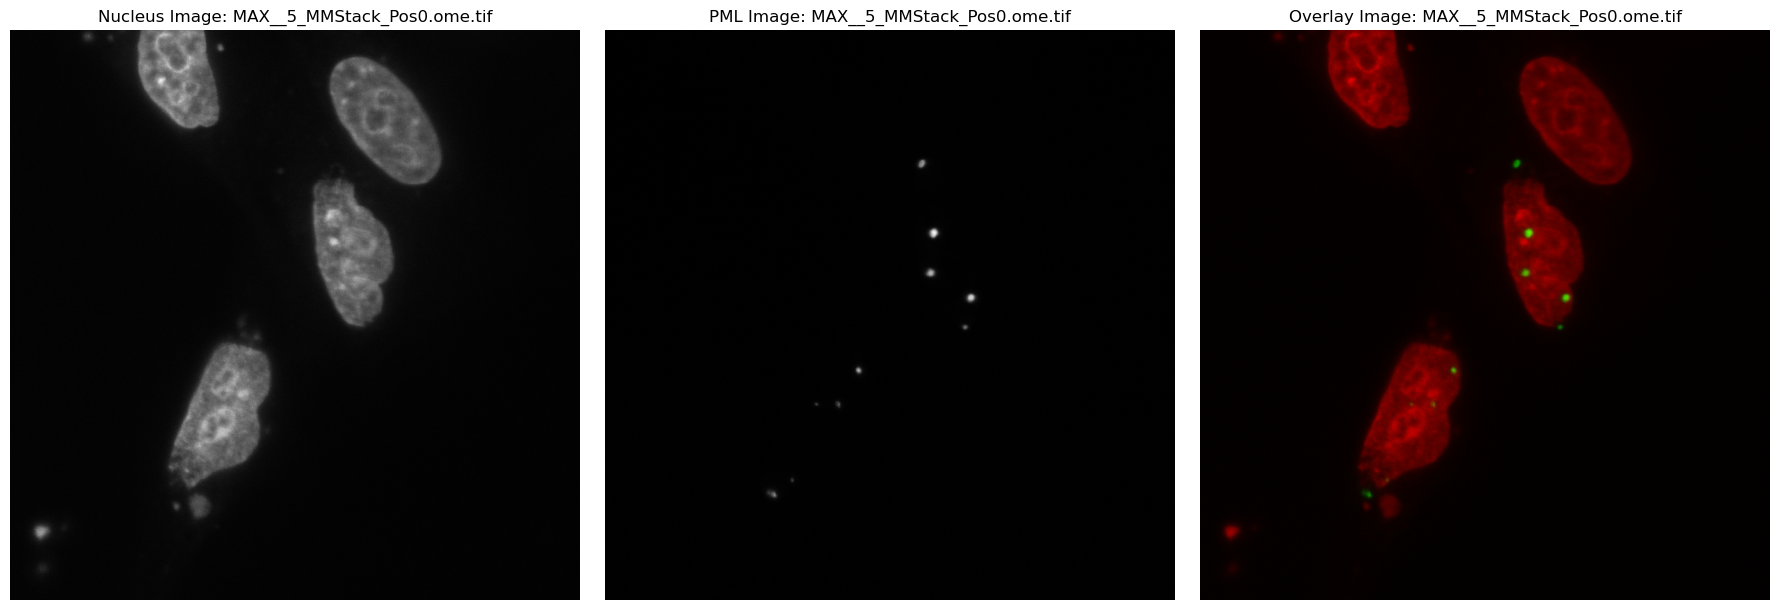

Processing file MAX__20_MMStack_Pos0.ome.tif, shape: (2, 1072, 1072)


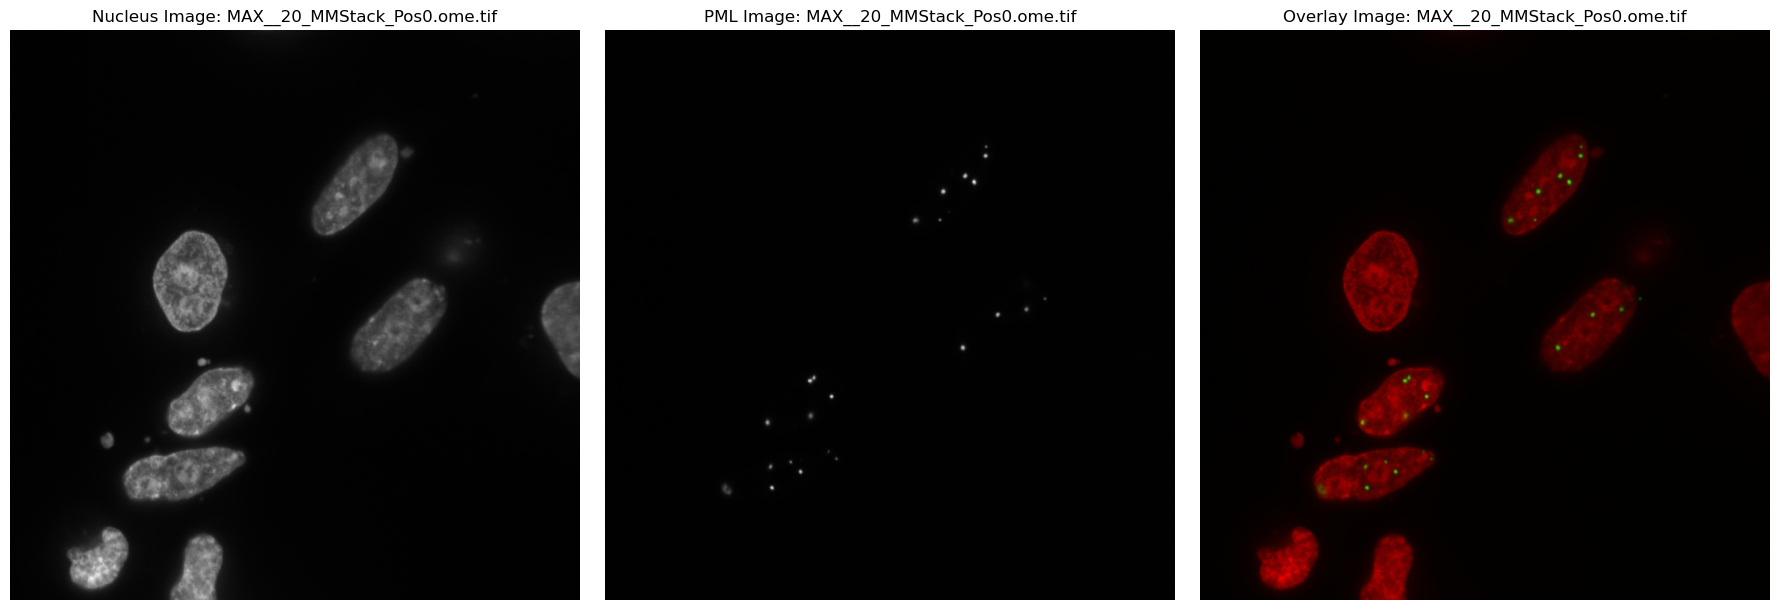

In [5]:
import os
from skimage import io, img_as_float
from skimage.color import gray2rgb
import matplotlib.pyplot as plt

# Define the folder path containing OME-TIFF files
folder_path = "/Users/zg/Mammouth/PROJECTS/Analysis/Image_Choice/PML-choice/emGFP-PMLwt-z-max"

# List all OME-TIFF files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.ome.tif')]

# Process each file
for file_name in file_list:
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    
    # Read the OME-TIFF file
    multi_channel_image = io.imread(file_path)
    
    # Check the shape of the multi-channel image
    print(f"Processing file {file_name}, shape: {multi_channel_image.shape}")
    
    # Ensure the image has the expected number of channels
    if multi_channel_image.ndim != 3 or multi_channel_image.shape[0] < 2:
        print(f"File {file_name} does not have enough channels or has an unexpected shape.")
        continue
    
    # Split the channels
    nucleus_image = multi_channel_image[1, :, :]
    pml_image = multi_channel_image[0, :, :]
    
    # Convert to float and normalize
    nucleus_image = img_as_float(nucleus_image)
    pml_image = img_as_float(pml_image)
    
    nucleus_image = (nucleus_image - nucleus_image.min()) / (nucleus_image.max() - nucleus_image.min())
    pml_image = (pml_image - pml_image.min()) / (pml_image.max() - pml_image.min())
    
    # Convert grayscale images to RGB
    nucleus_rgb = gray2rgb(nucleus_image)
    pml_rgb = gray2rgb(pml_image)
    
    # Create an overlay image
    overlay_image = nucleus_rgb.copy()
    overlay_image[..., 0] = nucleus_image  # Red channel for nucleus
    overlay_image[..., 1] = pml_image      # Green channel for PML
    overlay_image[..., 2] = 0              # Blue channel remains 0
    
    # Display the images
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].imshow(nucleus_image, cmap='gray')
    axes[0].set_title(f'Nucleus Image: {file_name}')
    axes[0].axis('off')
    
    axes[1].imshow(pml_image, cmap='gray')
    axes[1].set_title(f'PML Image: {file_name}')
    axes[1].axis('off')
    
    axes[2].imshow(overlay_image)
    axes[2].set_title(f'Overlay Image: {file_name}')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()



3.8.4
